**Podemos usar o orçamento de um filme para prever a receita ?**


In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("cost_revenue_dirty.csv")#carregando os dados
df.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


Como observado acima temos alguns dados de arrecadação mundial e o quanto arrecadou no mercado americano zerado.
Por isso temos que tirar esses dados do nosso estudo.

In [3]:
df = df.loc[df['Worldwide Gross ($)'] != '$0'] #aplicando filtro

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5034 entries, 0 to 5382
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5034 non-null   int64 
 1   Release Date           5034 non-null   object
 2   Movie Title            5034 non-null   object
 3   Production Budget ($)  5034 non-null   object
 4   Worldwide Gross ($)    5034 non-null   object
 5   Domestic Gross ($)     5034 non-null   object
dtypes: int64(1), object(5)
memory usage: 275.3+ KB


Acima observa-se que os dados da tabela não são numéricos, por isso temos que converter.
E para o estudo vamos usar a coluna Budget (receita) e Worldwide Gross(arrecadação mundial).

In [5]:
df[["lixo","Production_Budget_USD"]]=df['Production Budget ($)'].str.split('$',expand=True)# cria uma nova coluna tira o simbolo de cifra 
df[["lixo2","Worldwide_Gross_USD"]]=df['Worldwide Gross ($)'].str.split('$',expand=True)# cria uma nova coluna tira o simbolo de cifra 
df=df.drop(columns=['lixo','lixo2','Production Budget ($)','Worldwide Gross ($)','Domestic Gross ($)','Rank','Release Date','Movie Title',])#só as colunas utilizadas
df.head()

,Production_Budget_USD,Worldwide_Gross_USD
0,"110,000","11,000,000"
2,"200,000","8,000,000"
3,"100,000","3,000,000"
4,"245,000","22,000,000"
5,"3,900,000","9,000,000"


os dados ainda não são numéricos

In [6]:
#tira as virgulas das colunas
df['Production_Budget_USD']=df['Production_Budget_USD'].str.replace(',','')
df['Worldwide_Gross_USD']=df['Worldwide_Gross_USD'].str.replace(',','')

In [7]:
#converte para númerico
df["Production_Budget_USD"] = pd.to_numeric(df["Production_Budget_USD"])
df["Worldwide_Gross_USD"] = pd.to_numeric(df["Worldwide_Gross_USD"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5034 entries, 0 to 5382
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Production_Budget_USD  5034 non-null   int64
 1   Worldwide_Gross_USD    5034 non-null   int64
dtypes: int64(2)
memory usage: 118.0 KB


Podemos usar o describe para ver algumas analises prévias dos dados

In [9]:
df.describe()

,Production_Budget_USD,Worldwide_Gross_USD
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


Por algum motivo não funcionou seguir com o código. Por isso vou exportar e continuar

In [10]:
df.to_csv("cost_revenue_dirty_new.csv", index = False)

carregando o novo arquivo

In [11]:
df=pd.read_csv("cost_revenue_dirty_new.csv")#carregando os dados
df.head()

,Production_Budget_USD,Worldwide_Gross_USD
0,110000,11000000
1,200000,8000000
2,100000,3000000
3,245000,22000000
4,3900000,9000000


Para melhor organização, vou separar as variaveis

In [12]:
X=DataFrame(df,columns=['Production_Budget_USD'])
Y=DataFrame(df,columns=['Worldwide_Gross_USD'])

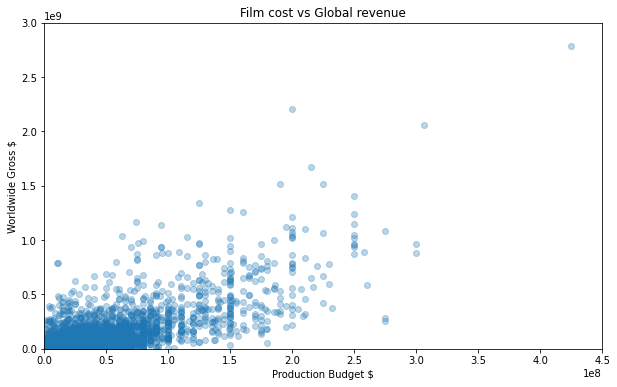

In [18]:
plt.figure(figsize=(10,6))#tamanho
plt.scatter(X,Y,alpha=0.3)
plt.title('Film cost vs Global revenue')# titulo do gráfico
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
#x e y label
plt.xlabel("Production Budget $")
plt.ylabel("Worldwide Gross $")
plt.show()

In [14]:
regression=LinearRegression()
regression.fit(X,Y)

LinearRegression()

**Slop Coefficient:**

In [15]:
regression.coef_ #theta 1

array([[3.11150918]])

para cada dolar gostado na produção de um filme, retorna 3.11150918

In [16]:
regression.intercept_

array([-7236192.72913963])

cada filme que o buget é zero perde-se 7 milhões de dolares

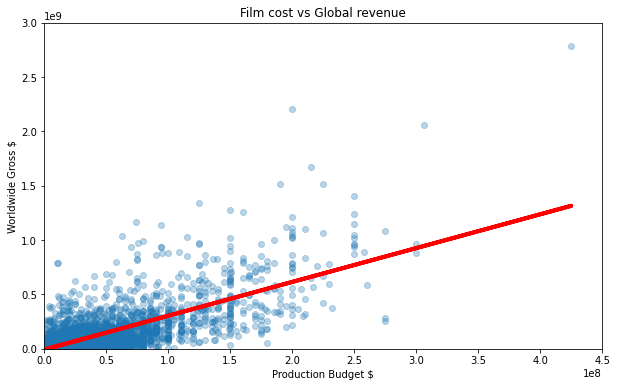

In [21]:
plt.figure(figsize=(10,6))#tamanho
plt.scatter(X,Y,alpha=0.3)
plt.plot(X,regression.predict(X),color='red',linewidth=4)
plt.title('Film cost vs Global revenue')# titulo do gráfico
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
#x e y label
plt.xlabel("Production Budget $")
plt.ylabel("Worldwide Gross $")
plt.show()

Um filme que custou 50 milhoes para ser produzido:
t0=-7236192.72
t1=3.11150918

h0(x)=-7236192.72+3.11150918*(x)
h0(x)=-7236192.72+3.11150918*500000000
ho(x)=148.339.266,28

In [22]:
#acuracia
regression.score(X,Y)

0.5496485356985729